# NYC Taxi Trip Exploratory Analysis

## Problem
- This data is for "New York City Taxi Trip Duration" competition on kaggle
- Goal: analysis before feed to model to predict the duration of NYC taxi trip.

## Setup and load data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import datetime as dt
import numpy as np
import calendar

In [2]:
df = pd.read_csv('nyc_taxi_data_2014.csv')

C:\Users\thanh\Miniconda3\envs\datasci\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Quick look

This is data on New York City Taxi Cab, which covers about 15 milions taxi trips in 2014.

In [3]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,CMT,2014-01-09 20:45:25,2014-01-09 20:52:31,1,0.7,-73.994770,40.736828,1,N,-73.982227,40.731790,CRD,6.5,0.5,0.5,1.40,0.0,8.90
1,CMT,2014-01-09 20:46:12,2014-01-09 20:55:12,1,1.4,-73.982392,40.773382,1,N,-73.960449,40.763995,CRD,8.5,0.5,0.5,1.90,0.0,11.40
2,CMT,2014-01-09 20:44:47,2014-01-09 20:59:46,2,2.3,-73.988570,40.739406,1,N,-73.986626,40.765217,CRD,11.5,0.5,0.5,1.50,0.0,14.00
3,CMT,2014-01-09 20:44:57,2014-01-09 20:51:40,1,1.7,-73.960213,40.770464,1,N,-73.979863,40.777050,CRD,7.5,0.5,0.5,1.70,0.0,10.20
4,CMT,2014-01-09 20:47:09,2014-01-09 20:53:32,1,0.9,-73.995371,40.717248,1,N,-73.984367,40.720524,CRD,6.0,0.5,0.5,1.75,0.0,8.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999999 entries, 0 to 14999998
Data columns (total 18 columns):
vendor_id             object
pickup_datetime       object
dropoff_datetime      object
passenger_count       int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
rate_code             int64
store_and_fwd_flag    object
dropoff_longitude     float64
dropoff_latitude      float64
payment_type          object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
dtypes: float64(11), int64(2), object(5)
memory usage: 2.0+ GB


- Each row represents one trip, there are 18 attributes
- The *trip_duration* variable has not been calculated (from *dropoff_datetime* and *pickup_datetime*)
- There are nearly 15 milions instance in the dataset. 
- Most attributes are numerical, except *pickup_datetime* and *dropoff_datetime* (self-explanatory), *vendor_id*, *rate_code*, *store_and_fwd_flag* and *payment_type* are probably categorical

In [5]:
df.payment_type.value_counts()

CRD    8667410
CSH    6215019
UNK      73983
NOC      33737
DIS       9850
Name: payment_type, dtype: int64

Two main payment type which is credit cards or cash

In [6]:
df.vendor_id.value_counts()

VTS    7634893
CMT    7365106
Name: vendor_id, dtype: int64

Two vendor with the nearly same trip

In [7]:
df.rate_code.value_counts()

1      14680744
2        249003
5         42052
3         21444
4          4955
0          1441
210         153
6           148
8            52
7             4
9             2
28            1
Name: rate_code, dtype: int64

Might be the rate for each trip, the 210 value looks like outlier

#### EXPLANATORY VARIABLES/ FEATURES
- *vendor_id* integer. A code indicating the provider associated with the trip. There appears to be 2 taxi companies.
- *pickup_datetime, dropoff_datetime* character. The date and time when the meter was engaged/disengaged. Combination of date and time.
- *passenger_count* integer. The number of passengers in the vehicle (driver entered value).
- *trip_distance* float. The distance of the trip, from 0 to 100 Km.
- *pickup_longitude, pickup_latitude* numeric. The longitude, latitude where the meter was engaged. These are geographical coordinates and appear to be in the correct format.
- *store_and_fwd_flag* character. This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server. Y=store and forward; N=not a store and forward trip.
- *dropoff_longitude, dropoff_latitude* numeric. The longitude, latitude where the meter was disengaged.
- *payment_type* character. A code indicating the type of payment passenger used for the trip. Apparently there are 5 types.
- *fare_amount, surcharge, mta_tax, tip_amount, tolls_amount* float. The itemed amount of money of the trip, all sumed up to *total_amount* float

- *trip_duration* float. Our response variables in second.

In [8]:
pd.set_option('display.float_format',lambda x : '%.2f'% x)
df.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,14999999.00,14999999.00,14999999.00,14999999.00,14999999.00,14999854.00,14999854.00,14999999.00,14999999.00,14999999.00,14999999.00,14999999.00,14999999.00
mean,1.70,2.79,-72.97,40.19,1.03,-72.91,40.16,12.01,0.31,0.50,1.46,0.24,14.52
std,1.39,3.33,8.59,4.76,0.72,8.84,4.90,10.07,0.36,0.03,2.24,1.19,12.17
min,0.00,0.00,-736.60,-180.00,0.00,-775.42,-180.00,2.50,0.00,0.00,0.00,0.00,2.50
25%,1.00,1.00,-73.99,40.74,1.00,-73.99,40.73,6.50,0.00,0.50,0.00,0.00,8.00
50%,1.00,1.70,-73.98,40.75,1.00,-73.98,40.75,9.00,0.00,0.50,1.00,0.00,11.00
75%,2.00,3.08,-73.97,40.77,1.00,-73.96,40.77,13.50,0.50,0.50,2.00,0.00,16.10
max,208.00,100.00,80.54,73.28,210.00,119.34,404.08,500.00,13.40,0.50,200.00,20.00,700.00


Notice a few things from above statistics:
<br>The pair of longitude and latitude appear to be in correct format that clustered around the region of New York indeed (with some outliers)
<br> passenger_count has some outliers too (max=208 doesnt make sense)

### Clean data

Trip with pickup/dropoff location far from New York region

In [3]:
longitude_outliers = (df['pickup_longitude']<-74.2) | (df['pickup_longitude']>-73.5)
num_longitude_outliers = df[longitude_outliers].shape[0]
df = df.drop(df[longitude_outliers].index)

latitude_outliers = (df['pickup_latitude']<40.2) | (df['pickup_latitude']>41.0)
num_latitude_outliers = df[latitude_outliers].shape[0]
df = df.drop(df[latitude_outliers].index)

In [4]:
longitude_outliers = (df['dropoff_longitude']<-74.2) | (df['dropoff_longitude']>-73.5)
num_longitude_outliers = df[longitude_outliers].shape[0]
df = df.drop(df[longitude_outliers].index)

latitude_outliers = (df['dropoff_latitude']<40.2) | (df['dropoff_latitude']>41.0)
num_latitude_outliers = df[latitude_outliers].shape[0]
df = df.drop(df[latitude_outliers].index)

Check null data

In [11]:
df.isnull().sum()

vendor_id                   0
pickup_datetime             0
dropoff_datetime            0
passenger_count             0
trip_distance               0
pickup_longitude            0
pickup_latitude             0
rate_code                   0
store_and_fwd_flag    7560117
dropoff_longitude         115
dropoff_latitude          115
payment_type                0
fare_amount                 0
surcharge                   0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
dtype: int64

In [5]:
df = df.dropna(subset=['dropoff_longitude','dropoff_latitude'])

Caculate and clean data with trip_duration = 0

In [6]:
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

df['trip_duration'] = df['dropoff_datetime']- df['pickup_datetime']
df['trip_duration'] = df['trip_duration'].dt.seconds

In [7]:
df = df.drop(df[df['trip_duration']==0].index)

In [15]:
pd.set_option('display.float_format',lambda x : '%.2f'% x)
df.describe()

,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,trip_duration
count,14757798.00,14757798.00,14757798.00,14757798.00,14757798.00,14757798.00,14757798.00,14757798.00,14757798.00,14757798.00,14757798.00,14757798.00,14757798.00,14757798.00
mean,1.70,2.80,-73.98,40.75,1.03,-73.97,40.75,11.95,0.32,0.50,1.45,0.24,14.45,741.58
std,1.37,3.30,0.03,0.03,0.70,0.03,0.03,9.62,0.36,0.03,2.19,1.18,11.71,565.85
min,0.00,0.00,-74.20,40.24,0.00,-74.20,40.20,2.50,0.00,0.00,0.00,0.00,2.50,1.00
25%,1.00,1.00,-73.99,40.74,1.00,-73.99,40.74,6.50,0.00,0.50,0.00,0.00,8.00,360.00
50%,1.00,1.70,-73.98,40.75,1.00,-73.98,40.75,9.00,0.00,0.50,1.00,0.00,11.00,600.00
75%,2.00,3.09,-73.97,40.77,1.00,-73.96,40.77,13.50,0.50,0.50,2.00,0.00,16.10,960.00
max,9.00,100.00,-73.50,41.00,210.00,-73.50,41.00,500.00,12.00,0.50,200.00,20.00,700.00,79074.00


## Discover and Visualise data

### Distribution of trip duration

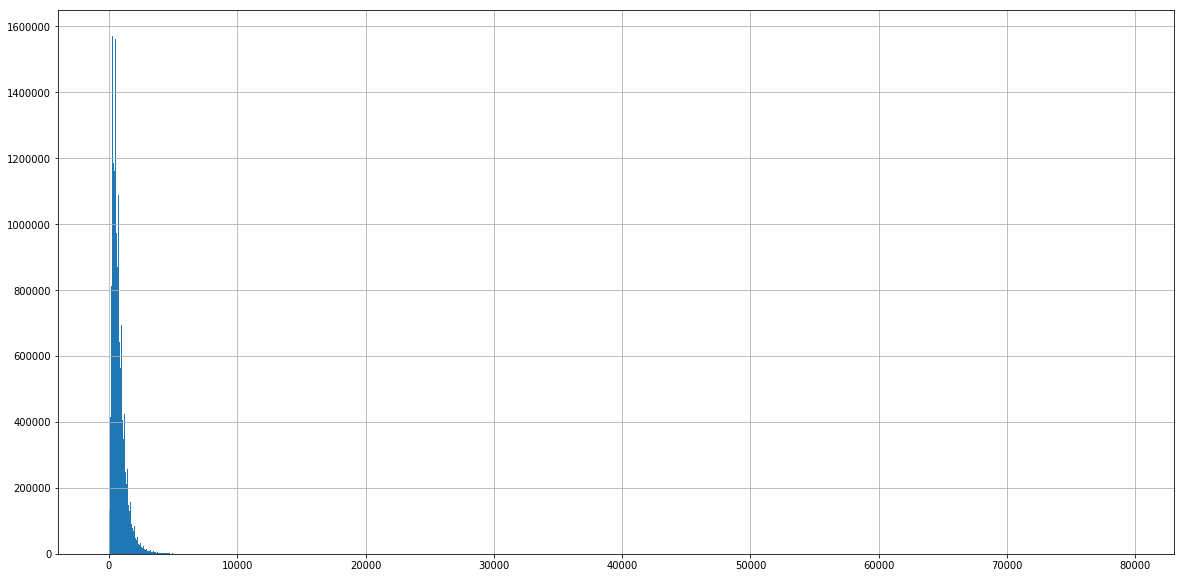

In [16]:
(df['trip_duration']).hist(bins=1000,figsize=(20,10))

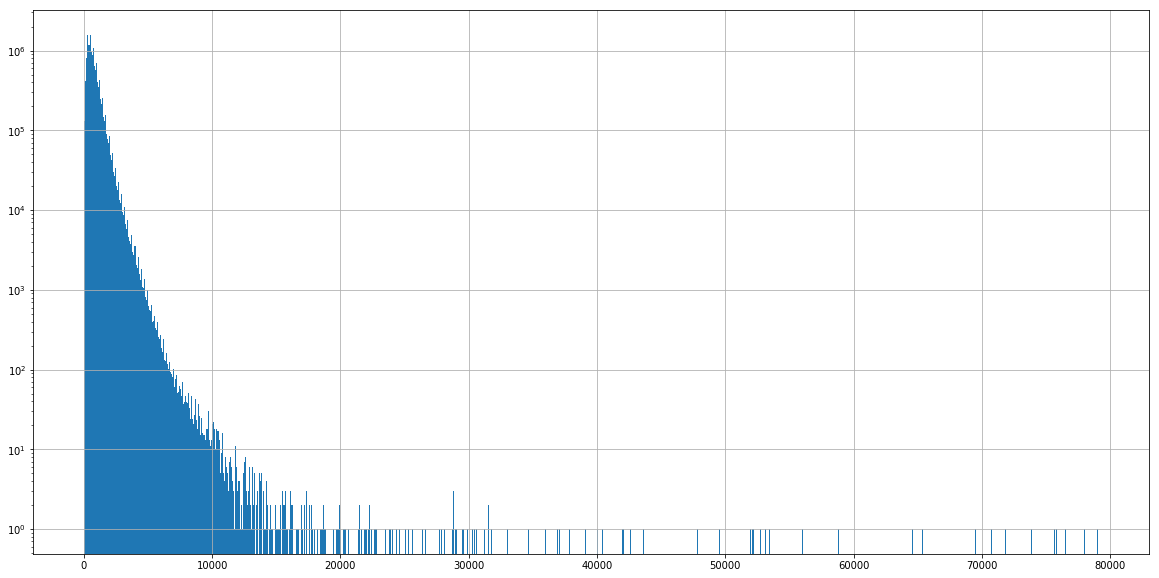

In [17]:
(df['trip_duration']).hist(bins=1000,figsize=(20,10),log=True)

Trip duration follows long tail distribution.To understand the distribution of fare amount better we take a log transformation after removing the negative fares- this makes the distribution close to normal

### Passenger Count

In [18]:
df['passenger_count'].value_counts()

1    10421333
2     2013112
5      852275
3      602407
6      584519
4      284032
0          99
9          14
8           4
7           3
Name: passenger_count, dtype: int64

From the passenger count value counts,we could expect: most cab rides have single or few passengers

### Distribution of trip distance

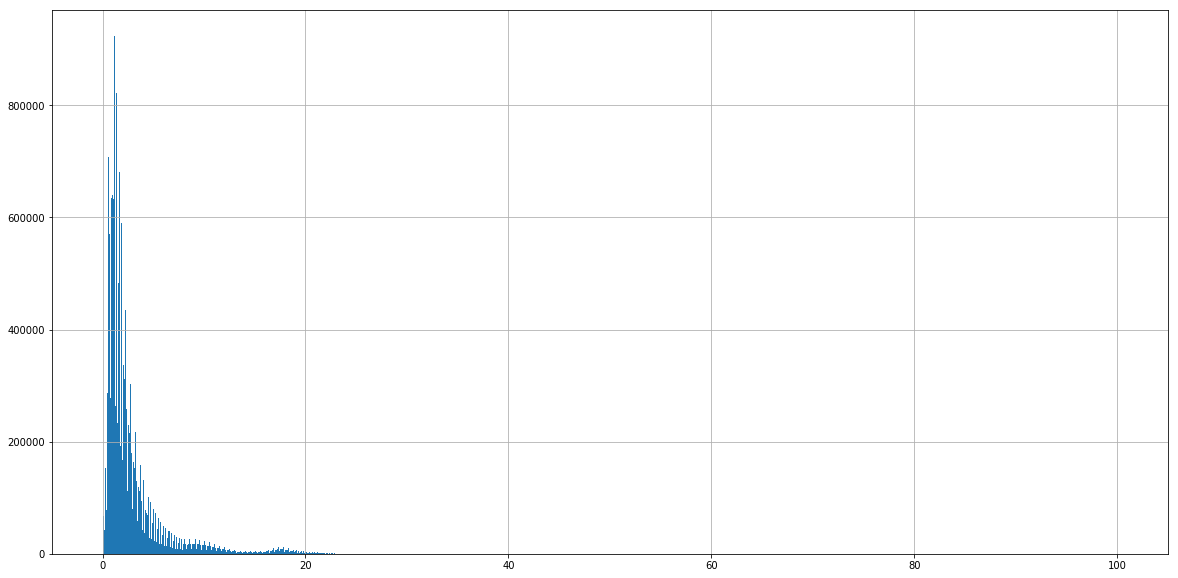

In [19]:
(df['trip_distance']).hist(bins=1000,figsize=(20,10))

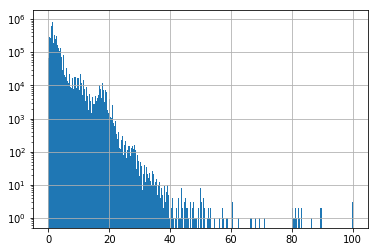

In [20]:
df["trip_distance"].hist(log=True,bins=1000)
plt.show()

Trip distance just like trip duration, follows long tail distribution. So one of my hypothesis was just the trip duration should ideally increase with trip distance. We should look for correlation between these two attributes

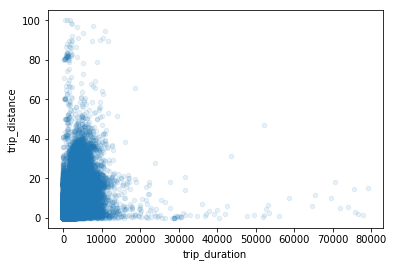

In [21]:
df.plot(kind="scatter",x="trip_duration",y="trip_distance",alpha=0.1)

A scatter plot between trip distance and trip duration showed that though there is a linear relationship,the duration per mile (slope) was higher, and there were a lot of trips whose distance was greater than 50 miles, but duration was very short

### Distribution of Pickup date time

To analyse how trip durations have changed over time, we have to create features like hour, day of the week, day from pickup datetime. No need to extract year and month since the data we have only cover 2014 Jan and Feb

In [33]:
df['pickup_date']= df['pickup_datetime'].dt.date
df['pickup_day']=df['pickup_datetime'].apply(lambda x:x.day)
df['pickup_day_of_week']=df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df['pickup_hour']=df['pickup_datetime'].apply(lambda x:x.hour)
df['pickup_month']=df['pickup_datetime'].apply(lambda x:x.month)

In [34]:
df['dropoff_date']= df['dropoff_datetime'].dt.date
df['dropoff_day']=df['dropoff_datetime'].apply(lambda x:x.day)
df['dropoff_day_of_week']=df['dropoff_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
df['dropoff_hour']=df['dropoff_datetime'].apply(lambda x:x.hour)
df['dropoff_month']=df['dropoff_datetime'].apply(lambda x:x.month)

Distribution across Day of Week

[Text(0, 0, 'Friday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday')]

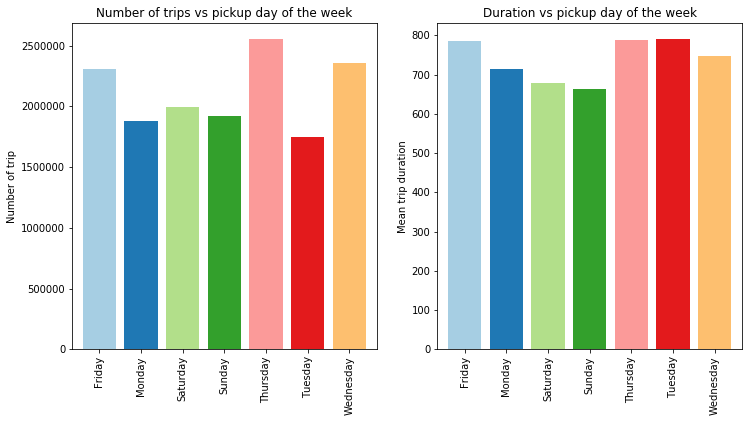

In [42]:
df1 = df.groupby(['pickup_day_of_week']).size().reset_index()
df2 = df.groupby(['pickup_day_of_week'])['trip_duration'].mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
df1.plot(kind='bar',ax=axes[0],legend=False,title='Number of trips vs pickup day of the week',width=0.8,color=[plt.cm.Paired(np.arange(len(df1)))])
axes[0].set_ylabel('Number of trip')
axes[0].set_xticklabels(['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday'])
df2.plot(kind='bar',ax=axes[1],legend=False,title='Duration vs pickup day of the week',width=0.8,color=[plt.cm.Paired(np.arange(len(df2)))])
axes[1].set_ylabel('Mean trip duration')
axes[1].set_xticklabels(['Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday'])

Number of pickups are higher on Thursday and Friday, and the mean duration is also high. On Saturday and Sunday, the number of trips are lower so is the avg trip duration

Distribution Across Hours

Text(0.5, 0, 'Mean trip duration')

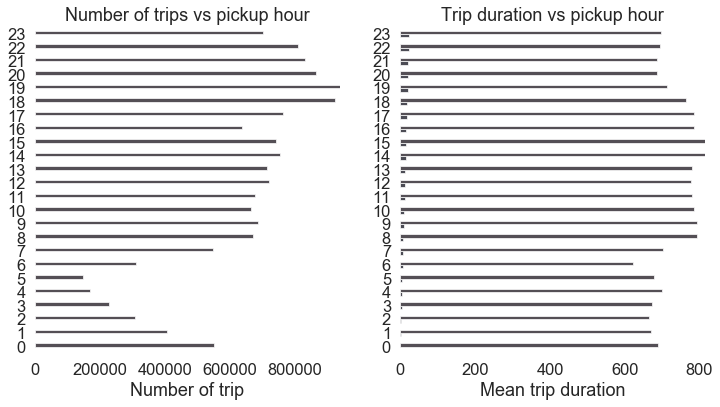

In [35]:
df1 = df.groupby(['pickup_hour']).size().reset_index()
df2 = df.groupby(['pickup_hour'])['trip_duration'].mean().reset_index()

a = 0.7
customcmap = [(x/24.0,  x/48.0, 0.05) for x in range(len(df))]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
df1.plot(kind='barh', ax=axes[0], alpha=a, legend=False, 
         color=customcmap,edgecolor='w',title='Number of trips vs pickup hour', xlim=(0,max(df1[0])))
axes[0].grid(False)
axes[0].set_frame_on(False)
axes[0].set_xlabel('Number of trip')

df2.plot(kind='barh', ax=axes[1], alpha=a, legend=False, 
         color=customcmap,edgecolor='w',title='Trip duration vs pickup hour', xlim=(0,max(df2['trip_duration'])))
axes[1].grid(False)
axes[1].set_frame_on(False)
axes[1].set_xlabel('Mean trip duration')

The average trip duration at 14-15 pm is the highest while the number of trips at that hours is not highest.

#### Calculate the distance and speed

In [26]:
speed = df['trip_distance'] / df['trip_duration']

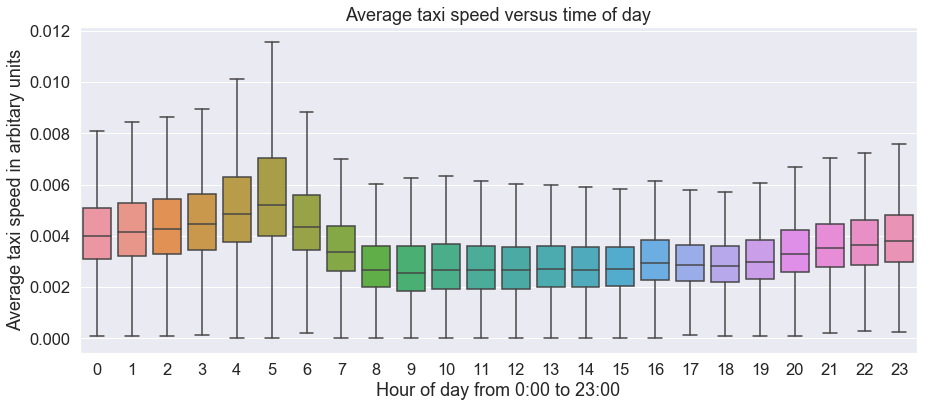

In [36]:
# plot speed against the time of the day
sns.set(font_scale=1.5)
plt.figure(figsize=(15,6))
sns.boxplot(df['pickup_hour'],speed,showfliers = False)
plt.title('Average taxi speed versus time of day')
plt.xlabel('Hour of day from 0:00 to 23:00')
plt.ylabel('Average taxi speed in arbitary units')

From the above figure, we can see that time plays pronounced effect on taxi speed. During the early morning, it is the time that taxi travels fastest, and then slows down very substantially (average taxi speed roughly halves) beginning at 7:00 AM.

### Distribution of Geographical Features

In [21]:
import datashader as ds
from datashader import transfer_functions as tr_fns

In [22]:
NYC = x_range, y_range = ((-74.05, -73.7), (40.6, 40.9))

plot_width = int(500)
plot_height = int(plot_width//1.2)

cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(df, 'pickup_longitude', 'pickup_latitude', ds.count('passenger_count'))
img = tr_fns.shade(agg, cmap=["green", 'darkblue'], how='linear')

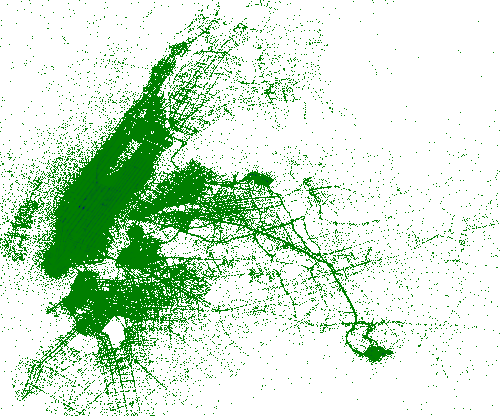

In [23]:
img

In [17]:
agg = cvs.points(df, 'dropoff_longitude', 'dropoff_latitude', ds.count('passenger_count'))
img = tr_fns.shade(agg, cmap=["blue", 'darkblue'], how='linear')

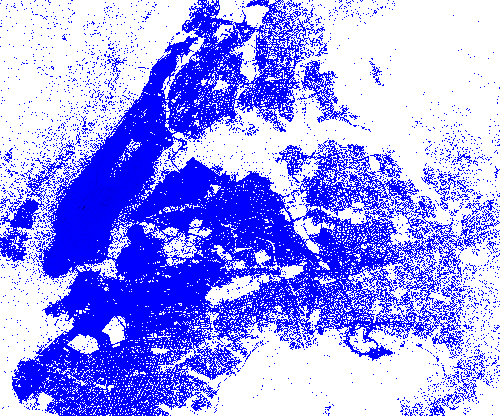

In [18]:
img

We can see that there is a high density of pickups near JFK and La Guardia Airport

*End notes:*
With this exploratory analysis, we will see how we can use the features identified to create machine learning models and understand how to evaluate machine learning models